* Do this after converting geotiff to netcdf with other notebook
* Switch environment for this notebook to plants_and_TCR_v3

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import xarray as xr

In [8]:
trial_number=3
geotiff_folder_output = '/home/disk/eos9/czarakas/Data/'
nc_fname_reproj2 = geotiff_folder_output+"Berner_example"+"_reprojected"+str(trial_number)+"b.nc"
ds = xr.open_dataset(nc_fname_reproj2)
ds

<xarray.Dataset>
Dimensions:  (lat: 2154, lon: 2726)
Coordinates:
  * lat      (lat) float64 28.48 28.49 28.5 28.51 ... 52.06 52.07 52.08 52.09
  * lon      (lon) float64 -130.4 -130.4 -130.4 -130.4 ... -100.6 -100.6 -100.5
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.1.0, released 2020/05/03
    history:             Thu Aug 27 14:15:28 2020: GDAL CreateCopy( /home/dis...

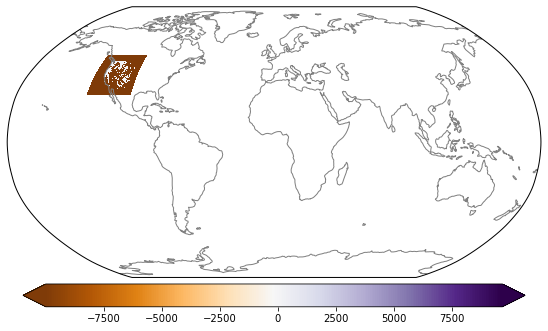

In [15]:
ds_to_plot = ds['Band1']

fig = plt.figure(figsize=[10,6])
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='gray')
ax.set_global()
cyclic_data, cyclic_lons = add_cyclic_point(ds_to_plot, coord=ds_to_plot['lon'])
cs = plt.pcolormesh(cyclic_lons, ds_to_plot['lat'], cyclic_data,
                            transform=ccrs.PlateCarree())

cbar = plt.colorbar(ax=ax, orientation='horizontal',
                    extend='both', pad=.02, shrink=0.9)
plt.set_cmap(plt.cm.PuOr)
#plt.clim([-100,100])
#cbar.set_clim([-100,100])
plt.show()

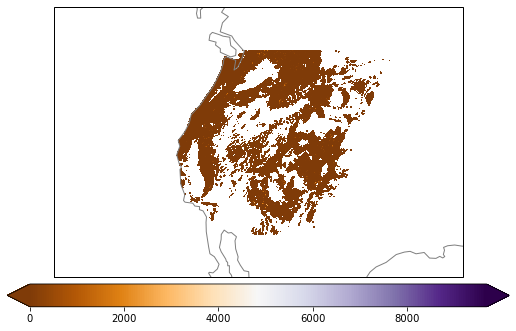

In [20]:
ds_to_plot = ds['Band1'].where(ds_to_plot>-9999) # I think -9999 is null? not sure what this data means though

fig = plt.figure(figsize=[10,6])
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='gray')
cyclic_data, cyclic_lons = add_cyclic_point(ds_to_plot, coord=ds_to_plot['lon'])
cs = plt.pcolormesh(cyclic_lons, ds_to_plot['lat'], cyclic_data,
                            transform=ccrs.PlateCarree())

cbar = plt.colorbar(ax=ax, orientation='horizontal',
                    extend='both', pad=.02, shrink=0.9)
plt.set_cmap(plt.cm.PuOr)
#plt.clim([-100,100])
#cbar.set_clim([-100,100])
plt.show()